# week3-sessionn2 住宅情報の分析

# 2.エイムズ市の住宅価格  
アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。  
住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。  
エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。  
Ames, Iowa - Wikipedia  
https://en.wikipedia.org/wiki/Ames,_Iowa

# 3.KaggleのNotebooks  
Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。  

これ以降Kaggleを利用していきますので、アカウントを作成してください。  
《参考Notebooks》  
Comprehensive data exploration with Python | Kaggle（まずはここから）  
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

House Prices : EDA to ML (Beginner) | Kaggle  
https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner

A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle  
https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos

### 0.0.0（補足）kaggleの有用性  

- 世界のデータセットを使って実用性の高い問題に取り組める。
- Notebooks(元はカーネル)で初心者にも優しい解答コード付きの問題への取り組み。
- 世界中の機械学習エンジニアとコミニュケーションを取ることが出来る。

# 4.データセットの準備  
データセットはKaggleからダウンロードします。  
House Prices: Advanced Regression Techniques | Kaggle  
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

上記URLを開き、Dataのページへ移動してください。  
この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

##  【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

### 1.1.1（モジュールのインポート）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### 1.1.1（解答）

In [2]:
df = pd.read_csv("sample_dataset/house-prices-advanced-regression-techniques/train.csv")

print(f"shape of data:{df['Id'].shape}")
print(f"Keys of House Prices DATA: \n{df.keys()}") 

shape of data:(1460,)
Keys of House Prices DATA: 
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageAre

## 【問題2】データセット自体の調査  
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

### 2.1.1（解答）

住宅購入者が思い描く夢の家についての様々な立地や設備の状況など、  
住宅価格に影響を与える79項目のデータを記した、アイオワ州エイムズの住宅の1460宅分のデータセットです。

ゴール　　
各家の販売価格を予測するのはあなたの仕事です。テストセットのIDごとに、SalePrice変数の値を予測する必要があります。 

**主要な項目**
SalePrice-プロパティのドルでの販売価格。これは、予測しようとしているターゲット変数です。  
MSSubClass：建物クラス
MSZoning：一般的なゾーニング分類
LotFrontage：プロパティに接続された通りの直線フィート
LotArea：平方フィート単位のロットサイズ
通り：道路アクセスのタイプ
路地：路地へのアクセスの種類
LotShape：プロパティの一般的な形状
LandContour：プロパティの平坦度
ユーティリティ：利用可能なユーティリティの種類
LotConfig：ロット構成
LandSlope：プロパティの勾配
近隣：エイムズ市域内の物理的な場所
条件1：幹線道路または鉄道への近さ
条件2：幹線道路または鉄道への近接性（秒が存在する場合）
BldgType：住居のタイプ
HouseStyle：住居のスタイル
OverallQual：総合素材と仕上がりの品質
OverallCond：総合状態評価
YearBuilt：元の建設日
YearRemodAdd：改造日
Foundation：基礎の種類
BsmtQual：地下室の高さ
BsmtCond：地下室の一般的な状態
TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）
Functional:：ホーム機能評価
Fireplaces：暖炉の数
FireplaceQu：暖炉の品質
GarageType：ガレージの場所
GarageYrBlt：ガレージが建てられた年
GarageFinish：ガレージの内装仕上げ
GarageCars：車の容量でのガレージのサイズ
GarageArea：ガレージのサイズ（平方フィート）
GarageQual：ガレージ品質
GarageCond：ガレージの状態
PoolArea：平方フィート単位のプール面積
PoolQC：プールの品質
MiscFeature：他のカテゴリでカバーされていないその他の機能
MiscVal：その他の機能の$ Value
MoSold：販売月
YrSold：販売年
SaleType：販売の種類
SaleCondition：販売条件

# 5.データの概観

## 【問題3】データの確認  
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。

### 3.1.1（解答） 各特徴量がどういったものかを見る。（数値データか文字データなど）

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 3.2.1（解答） 今回の目的変数はどの列か確認する。

In [5]:
objective = "SalePrice"

print(f"今回使う目的変数は、{objective}で、列番号は{df.columns.get_loc(objective)}です。")
print(f"{df.columns.get_loc(objective)}番目のカラム名は、{df.columns[80]}です。")

今回使う目的変数は、SalePriceで、列番号は80です。
80番目のカラム名は、SalePriceです。


### 3.3.1（解答） 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応  
欠損値に関して以下のことを行い、レポートしてください。

### 4.1.1（解答）各特徴量の欠損値の有無を確認する。
欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。  
ResidentMario/missingno: Missing data visualization module for Python.  
https://github.com/ResidentMario/missingno

In [7]:
pip install missingno #missingnoというライブラリのインストール

Note: you may need to restart the kernel to use updated packages.


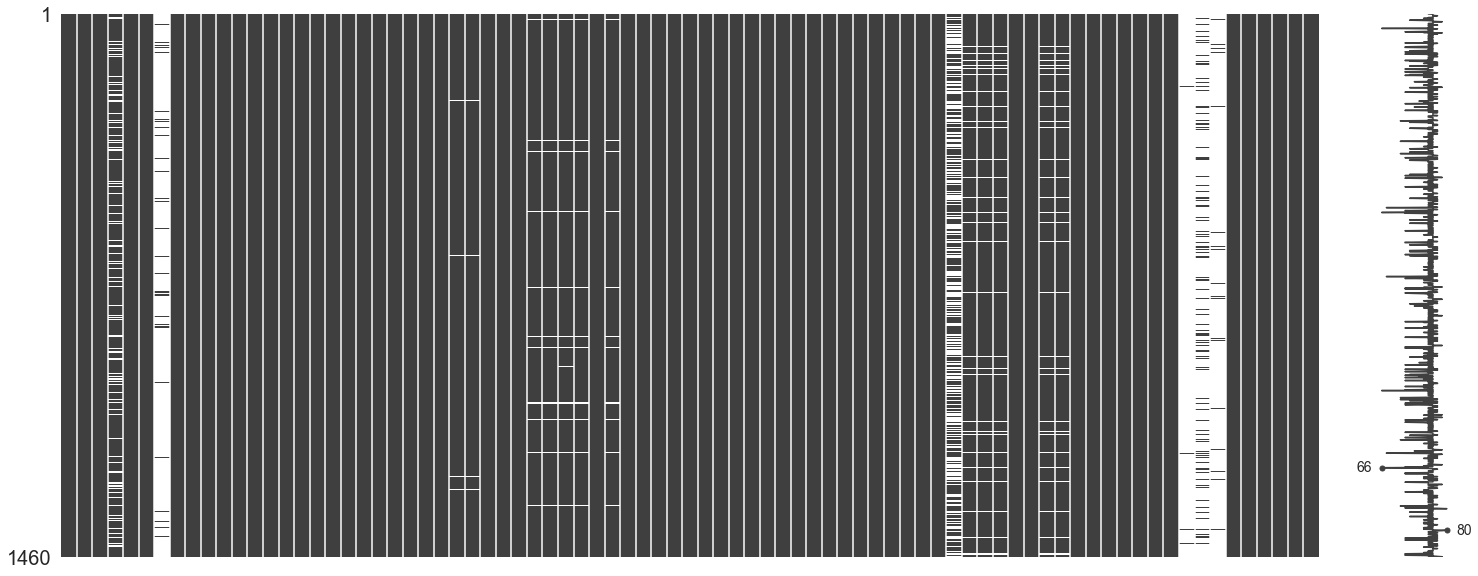

In [8]:
import missingno as msno

msno.matrix(df)

### 4.2.1（解答）欠損値が何パーセント含まれるかを確認する。

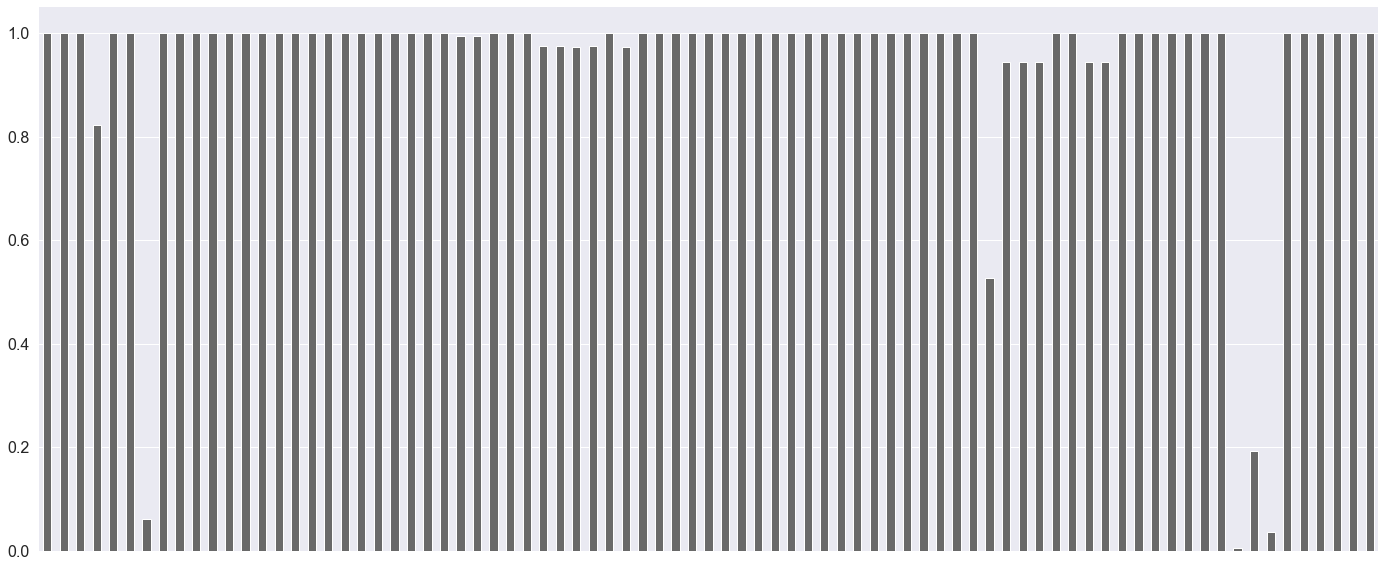

In [9]:
msno.bar(df)

### 4.2.2（予備知識）欠損値の個数を確認する。

In [10]:
missing_value = df.isnull().sum()
#isnull()は欠損値かどうかを返す、そこにsum()で欠損要素の個数の合計を求めている。
#isnull()の引数をaxis=1とすることで、行に対して処理できる。

print(missing_value[missing_value>0]) #欠損値が0以上の場合のみ表示する設定

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


### 4.2.3 (4.2.1 別の解答)

In [11]:
sample_data = len(df)
missing_valueas_rate = ((missing_value * 100) / sample_data)[missing_value>0]

print(f"{missing_valueas_rate}")

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


### 4.3.1（解答）5つ以上欠損値がある特徴量（列）は削除する。

In [12]:
df[df["LotFrontage"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,121000


In [13]:
df1 = df.dropna(thresh = (sample_data -4),axis=1)

### 4.3.2（確認）

In [14]:
missing_value = df1.isnull().sum()
print(missing_value[missing_value>0])

Electrical    1
dtype: int64


### 4.4.1（解答）欠損値があるサンプル（行）は削除する。

In [15]:
df1.dropna(how="any" ,axis=0)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# 6.目的変数  
次は目的変数がどのような分布を持っているか確認していきます。

# 【問題5】用語の調査  
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

### 5.1.1（解答）尖度と歪度

- 歪度（わいど :Skewness) データの分布の左右へのゆがみを表す。  
  ・分布が左右対称　　→（歪度）＝0  
  ・右にすそが長い分布　→（歪度）>0   
  ・左にすそが長い分布→（歪度）<0

- 尖度（せんど :Kurtosis） データの分布の尖がり具合を表す。 
  尖度が大きいほど尖った形になる。

# 【問題6】分布の確認  

### 6.1.1（解答）seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。  

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


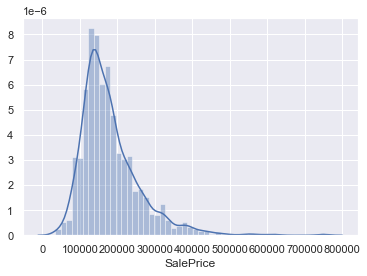

In [16]:
sns.distplot(df1[objective])

print("Skewness :",df1[objective].skew())
print("Kurtosis :",df1[objective].kurt())

### 6.2.1（解答）目的変数に対して対数変換を行う。

In [17]:
target_log = np.log(df1[objective]+1)
target_log

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

### 6.3.1（解答）対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

Skewness : 0.12134661989685329
Kurtosis : 0.809519155707878


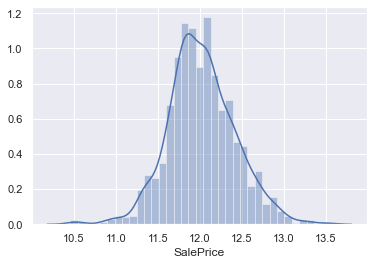

In [18]:
sns.distplot(target_log)

print("Skewness :",target_log.skew())
print("Kurtosis :",target_log.kurt())

### 6.4.1（解答）対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。  
このように加工することで予測時の精度を上げることができます。  
seaborn.distplot — seaborn 0.9.0 documentation  
https://seaborn.pydata.org/generated/seaborn.distplot.html

対数変換することで、スケールが大きいときはその範囲を縮小し、小さいときは拡大する。
外れ値を他の値に近づけることができるので、歪度を0の値に近づけて正規分布の形に近づけることができる。

# 7.特徴量

## 【問題7】相関係数の確認  
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。

### 7.1.1（解答）相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

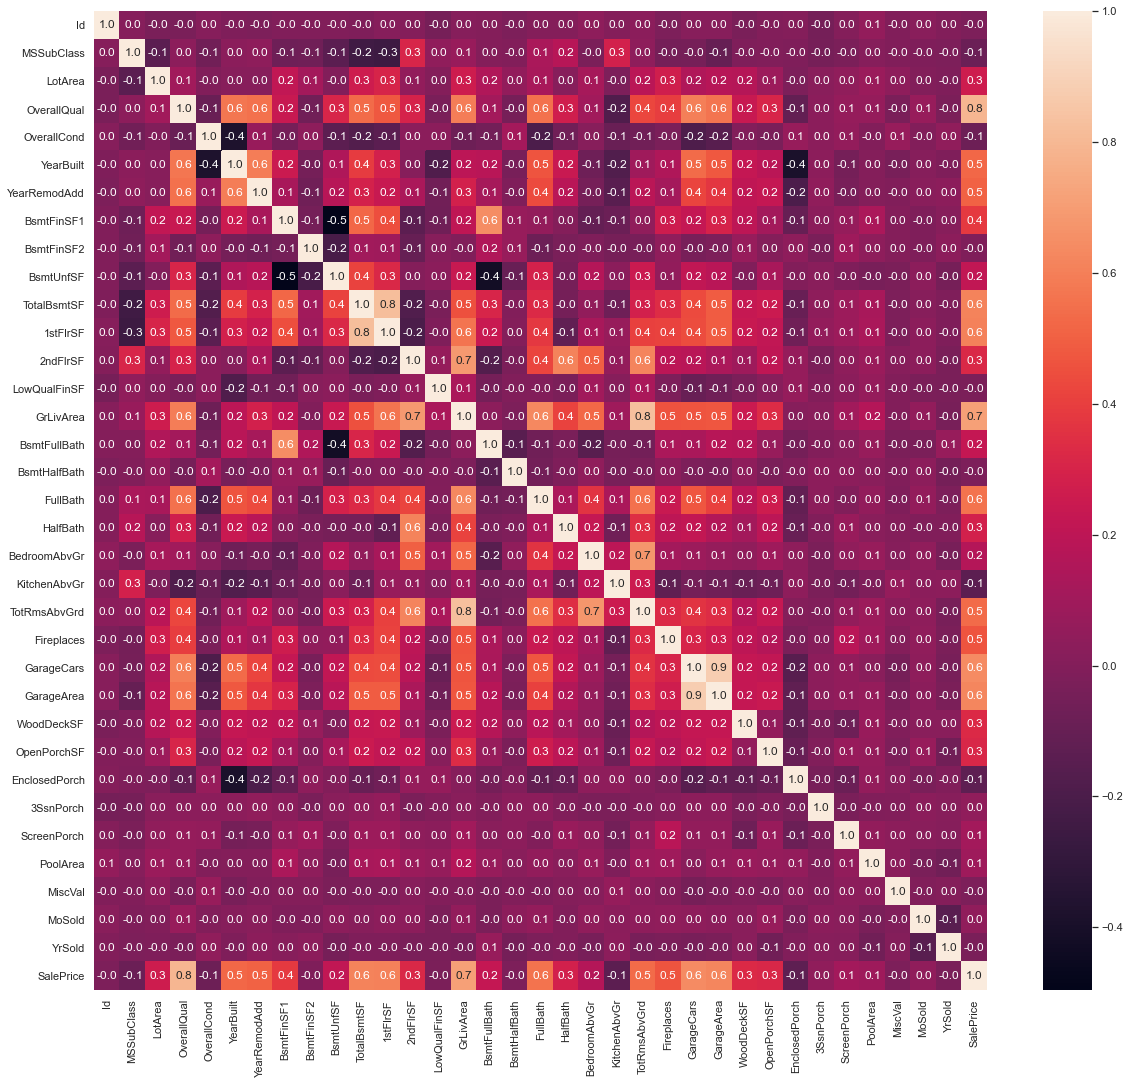

In [19]:
df_corr = df1.corr()

fig, ax = plt.subplots(1,1,figsize=(20,18))
sns.heatmap(df_corr, annot=True, fmt=".1f")

### 7.2.1（解答）目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [20]:
# 相関の高い１０個を選択する
df_s = df_corr[objective].sort_values(ascending=False)
print(df_s[1:11])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [21]:
# ターゲットと相関の高い10個をリスト化
df_list = df_s[0:11].keys()

# 上記のリストを元に元データをスライス
df3 = df1[df_list]
df3

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996


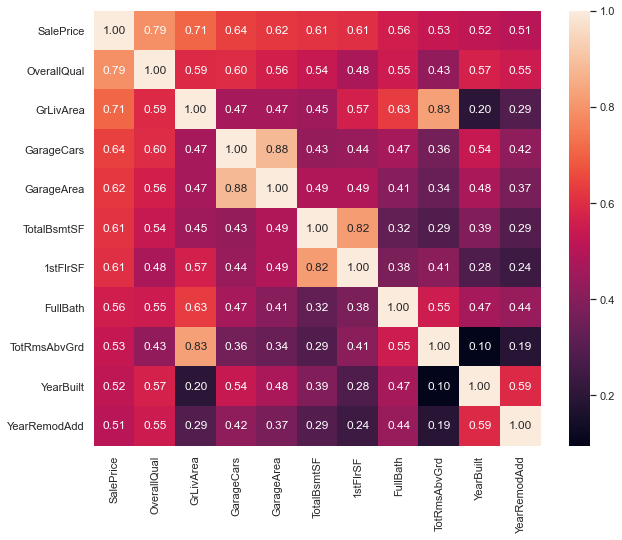

In [22]:
# 相関関係の算出
df3_corr = df3.corr()

#グラフ化
fig, ax = plt.subplots(1,1,figsize=(10,8))
sns.heatmap(df3_corr, annot=True, fmt=".2f")

### 7.3.1（解答）選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

**SalePriceと相関関係が高い特徴量の１０選**
- OverallQual：総合素材と仕上がりの品質
- GrLivArea:グレード（地上）のリビングエリアの平方フィート
- GarageCars：車の容量でのガレージのサイズ
- GarageArea：ガレージのサイズ（平方フィート）
- TotalBsmtSF:地下室の総平方フィート
- 1stFlrSF1階平方フィート
- FullBath:グレード以上のフルバスルーム
- TotRmsAbvGrd:グレード以上の総部屋数
- YearBuilt:建設日
- YearRemodAdd:リフォーム日

### 7.4.1（解答）選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  
《補足》  
重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

**お互いに相関関係が高い組み合わせ３選**
- GarageArea : GarageCars = 0.88
- TotRmsAbvGrd : GrLivArea = 0.83
- 1stFlrSF : TotalBsmtSF = 0.82